<a href="https://colab.research.google.com/github/khansaintania/2025_VISI_KOMPUTER_TI2B/blob/main/Jobsheet_02_Klasifikasi_Gambar_Visi_Komputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum D1: Memulai Klasifikasi Gambar dengan Dataset Sederhana

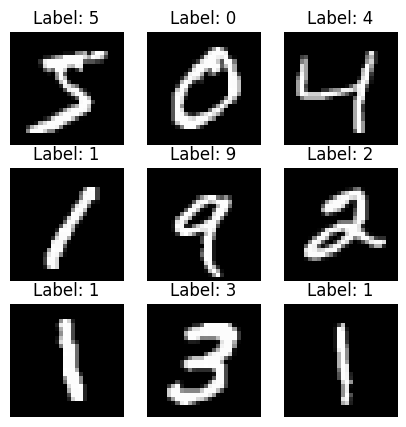

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

Tugas kecil: Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak contoh

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


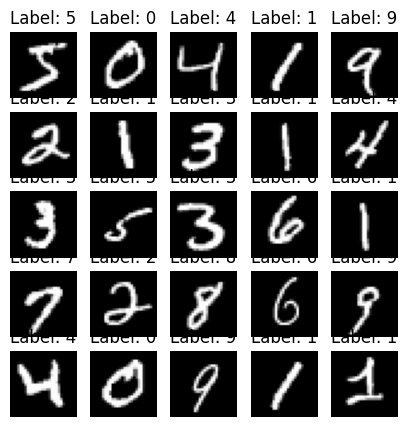

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

## Praktikum D2: Klasifikasi Gambar dengan Model Machine Learning Tradisional

In [11]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi: 0.1693


Tugas kecil: Ubah kernel dari linear menjadi rbf

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM dengan kernel RBF
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi (RBF):", accuracy_score(y_test, y_pred))


Akurasi (RBF): 0.9513


## Praktikum D3: Membangun CNN Sederhana

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8896 - loss: 0.3660 - val_accuracy: 0.9777 - val_loss: 0.0762
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.9785 - loss: 0.0698 - val_accuracy: 0.9832 - val_loss: 0.0647
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9858 - loss: 0.0459 - val_accuracy: 0.9847 - val_loss: 0.0530
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9865 - val_loss: 0.0498
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9858 - val_loss: 0.0521


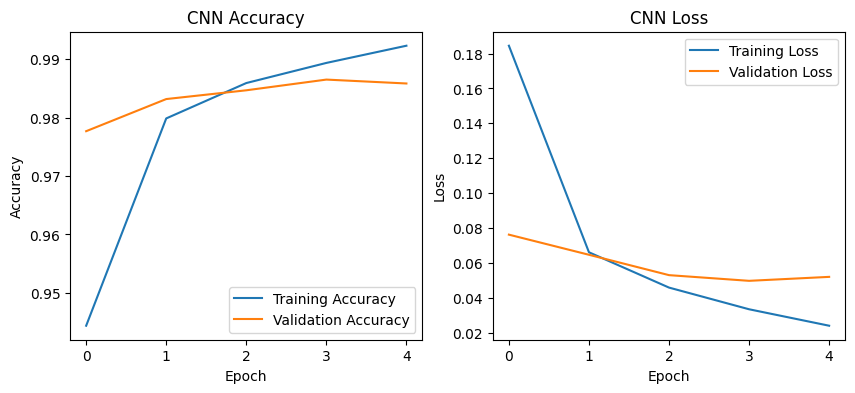

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Tugas kecil: Menambahkan satu lapisan Conv2D lagi sebelum Flatten

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.9119 - loss: 0.2896 - val_accuracy: 0.9867 - val_loss: 0.0486
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 32ms/step - accuracy: 0.9851 - loss: 0.0462 - val_accuracy: 0.9858 - val_loss: 0.0525
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9920 - loss: 0.0253 - val_accuracy: 0.9902 - val_loss: 0.0345
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9948 - loss: 0.0160 - val_accuracy: 0.9870 - val_loss: 0.0475
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9953 - loss: 0.0140 - val_accuracy: 0.9908 - val_loss: 0.0396


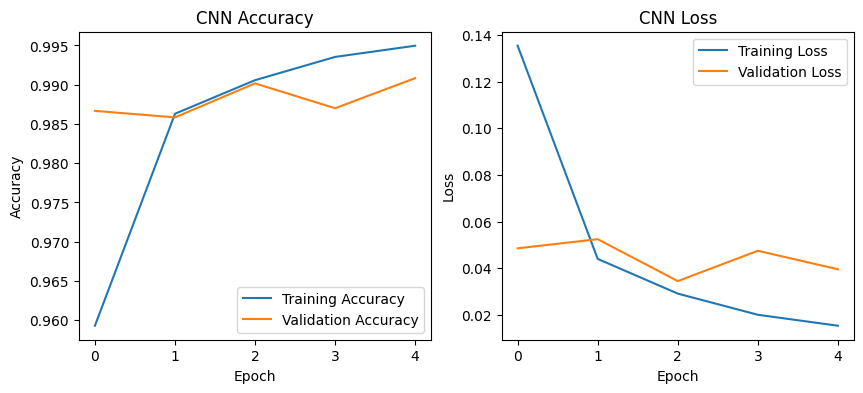

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    # Tambahan Conv2D kedua
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D4: D4 Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 51ms/step - accuracy: 0.3674 - loss: 1.7203 - val_accuracy: 0.5476 - val_loss: 1.2786
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.5701 - loss: 1.2036 - val_accuracy: 0.6314 - val_loss: 1.0503
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.6480 - loss: 1.0109 - val_accuracy: 0.6616 - val_loss: 0.9846
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 41ms/step - accuracy: 0.6818 - loss: 0.9107 - val_accuracy: 0.6868 - val_loss: 0.9168
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.7075 - loss: 0.8452 - val_accuracy: 0.7032 - val_loss: 0.8767
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.7292 - loss: 0.7801 - val_accuracy: 0.6990 - val_loss: 0.9121
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.7511 - loss: 0.7171 - val_accuracy: 0.6970 - val_loss: 0.8914
Epoch 8/10
1407/1407 ━━

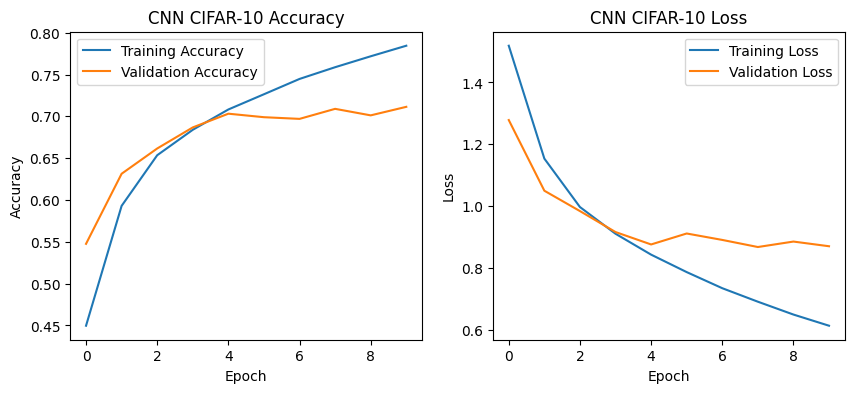

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Tugas kecil: Menambahkan Dropout(0.5) sebelum lapisan Dense terakhir

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.2852 - loss: 1.9149 - val_accuracy: 0.5124 - val_loss: 1.3700
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.4722 - loss: 1.4658 - val_accuracy: 0.5844 - val_loss: 1.1942
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.5248 - loss: 1.3171 - val_accuracy: 0.6276 - val_loss: 1.0596
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 50s 36ms/step - accuracy: 0.5575 - loss: 1.2333 - val_accuracy: 0.6392 - val_loss: 1.0314
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.5819 - loss: 1.1712 - val_accuracy: 0.6574 - val_loss: 0.9928
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.6049 - loss: 1.1065 - val_accuracy: 0.6714 - val_loss: 0.9514
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.6230 - loss: 1.0576 - val_accuracy: 0.6636 - val_loss: 0.9723
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.6357 -

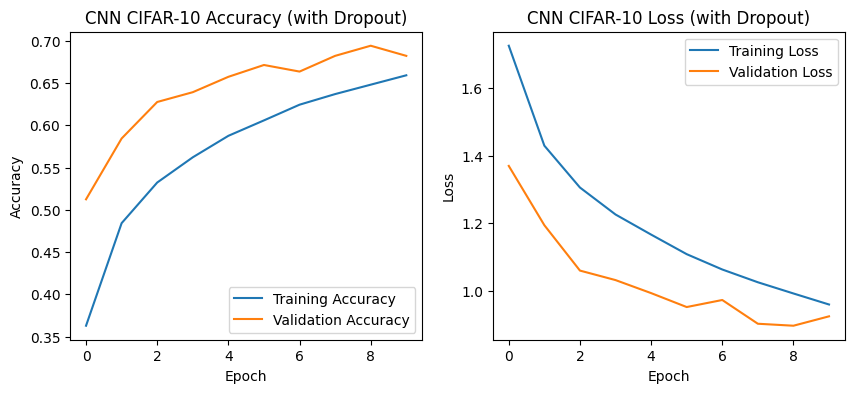

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # Tambahkan Dropout sebelum Dense terakhir
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy (with Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss (with Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D5: Transfer Learning dengan Model Pra-Latih

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 554s 393ms/step - accuracy: 0.4544 - loss: 1.5561 - val_accuracy: 0.5646 - val_loss: 1.2358
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 553s 386ms/step - accuracy: 0.5753 - loss: 1.2165 - val_accuracy: 0.5812 - val_loss: 1.2026
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 513s 365ms/step - accuracy: 0.6007 - loss: 1.1444 - val_accuracy: 0.5946 - val_loss: 1.1633
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 592s 387ms/step - accuracy: 0.6141 - loss: 1.1005 - val_accuracy: 0.6042 - val_loss: 1.1344
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 563s 388ms/step - accuracy: 0.6254 - loss: 1.0649 - val_accuracy: 0.6130 - val_loss: 1.1172


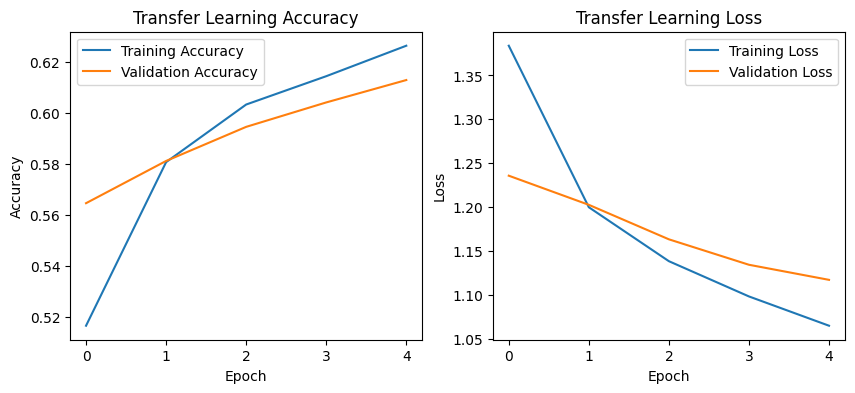

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Tugas kecil: Mengaktifkan 1-2 lapisan terakhir dari base_model (fine-tuning)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 623s 441ms/step - accuracy: 0.5082 - loss: 1.4091 - val_accuracy: 0.6124 - val_loss: 1.1347
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 578s 410ms/step - accuracy: 0.6315 - loss: 1.0569 - val_accuracy: 0.6404 - val_loss: 1.0434
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 652s 431ms/step - accuracy: 0.6561 - loss: 0.9783 - val_accuracy: 0.6538 - val_loss: 0.9964
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 594s 411ms/step - accuracy: 0.6759 - loss: 0.9189 - val_accuracy: 0.6558 - val_loss: 0.9893
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 660s 438ms/step - accuracy: 0.6876 - loss: 0.8731 - val_accuracy: 0.6738 - val_loss: 0.9470


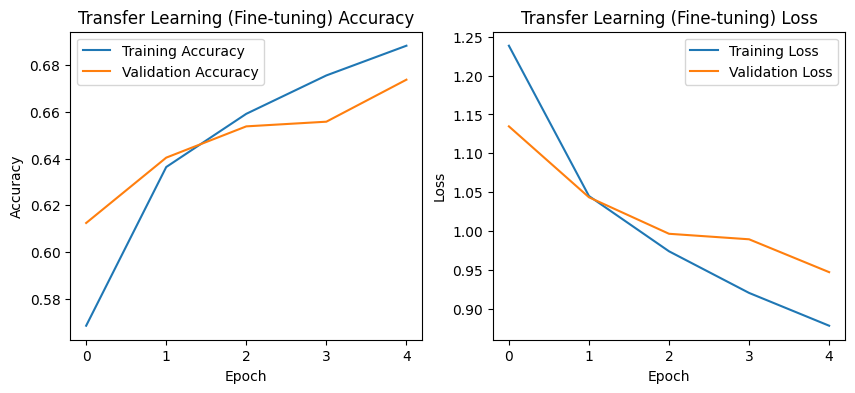

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load VGG16 tanpa top
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Awalnya freeze semua layer
base_model.trainable = True
for layer in base_model.layers[:-2]:   # Bekukan semua kecuali 2 lapisan terakhir
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning (Fine-tuning) Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning (Fine-tuning) Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Praktikum D6: Evaluasi dengan Confusion Matrix dan Metrik Lain

313/313 ━━━━━━━━━━━━━━━━━━━━ 104s 331ms/step
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.80      0.72      0.76      1000
           2       0.51      0.64      0.57      1000
           3       0.56      0.41      0.47      1000
           4       0.67      0.51      0.58      1000
           5       0.54      0.61      0.57      1000
           6       0.67      0.72      0.69      1000
           7       0.78      0.68      0.73      1000
           8       0.71      0.82      0.76      1000
           9       0.69      0.74      0.71      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



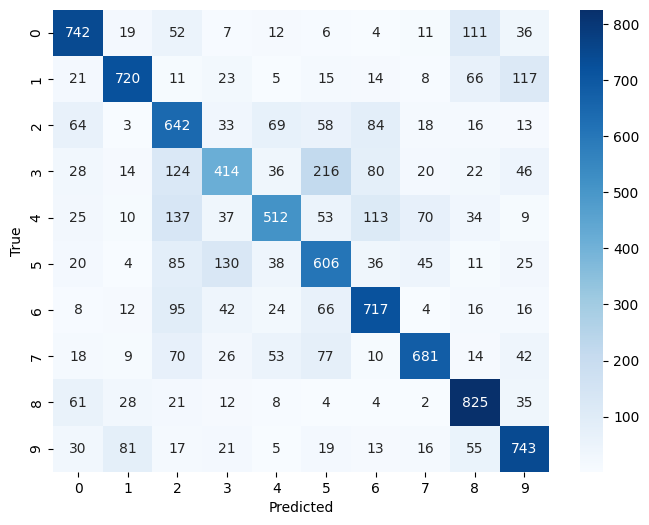

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Penugasan

In [7]:
# ===== Install & Import Library =====
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from google.colab import files

# =====  Upload foto =====
uploaded = files.upload()  # pilih foto angka kamu

# ===== Fungsi Preprocess agar mirip MNIST =====
def preprocess_to_mnist_28x28(img_pil):
    """
    - Grayscale + autocontrast
    - Invert bila background terang
    - Crop ke bounding box
    - Resize (20x20) + pad ke 28x28
    - Normalisasi [0,1]
    """
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)

    # Invert jika background terang (kertas putih)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Cari bounding box
    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi [0,1] + tambah channel
    arr = np.array(canvas).astype('float32') / 255.0
    arr = arr[..., None]  # (28,28,1)
    return canvas, arr

Saving angka enam kontras.JPG to angka enam kontras.JPG


✅ Model ditemukan, load dari file


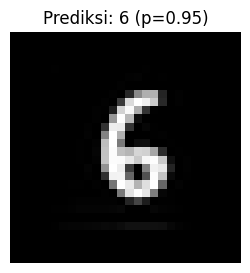

Rekap Prediksi (CNN):
- angka enam kontras.JPG -> 6 (p=0.946)


In [9]:
import os
if os.path.exists("cnn_mnist.h5"):
    print("✅ Model ditemukan, load dari file")
    model = load_model("cnn_mnist.h5")
else:
    print("⚡ Model belum ada, training dulu sebentar...")
    import tensorflow as tf
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
    x_test  = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))
    model.save("cnn_mnist.h5")
    print("✅ Model sudah ditraining & disimpan")

# ===== Prediksi gambar yang diupload =====
results = []
for fname in uploaded.keys():
    img_pil = Image.open(fname)
    disp, x = preprocess_to_mnist_28x28(img_pil)

    x_batch = np.expand_dims(x, axis=0)  # (1,28,28,1)

    probs = model.predict(x_batch, verbose=0)[0]
    pred = int(np.argmax(probs))
    conf = float(np.max(probs))
    results.append((fname, pred, conf))

    # Tampilkan gambar + hasil prediksi
    plt.figure(figsize=(3, 3))
    plt.imshow(disp, cmap='gray')
    plt.title(f"Prediksi: {pred} (p={conf:.2f})")
    plt.axis('off')
    plt.show()

# ===== Rekap hasil =====
print("Rekap Prediksi (CNN):")
for r in results:
    print(f"- {r[0]} -> {r[1]} (p={r[2]:.3f})")